# Problem Definition
This project aims to recommend a suitable crop to grow based on environmental conditions like nitrogen, phosphorous, potassium, temperature, humidity, pH, and rainfall.


In [5]:
!pip install mlflow

   ---------------------------------------- 0.0/24.7 MB ? eta -:--:--
   -- ------------------------------------- 1.6/24.7 MB 9.7 MB/s eta 0:00:03
   ------ --------------------------------- 3.9/24.7 MB 10.6 MB/s eta 0:00:02
   ---------- ----------------------------- 6.3/24.7 MB 10.6 MB/s eta 0:00:02
   -------------- ------------------------- 8.7/24.7 MB 10.7 MB/s eta 0:00:02
   ----------------- ---------------------- 11.0/24.7 MB 10.9 MB/s eta 0:00:02
   --------------------- ------------------ 13.4/24.7 MB 11.0 MB/s eta 0:00:02
   ------------------------- -------------- 15.7/24.7 MB 11.1 MB/s eta 0:00:01
   ----------------------------- ---------- 18.4/24.7 MB 11.2 MB/s eta 0:00:01
   --------------------------------- ------ 20.4/24.7 MB 11.2 MB/s eta 0:00:01
   ------------------------------------ --- 22.8/24.7 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------  24.6/24.7 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 24.7/24.7 MB 10.8 MB/s

In [6]:


import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


### Load Dataset

In [9]:
df = pd.read_csv("data/crop_recommendation.csv")
X = df.drop("label", axis=1)
y = df["label"]

### Encode Lables

In [10]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


### SVM is sensitive to the numbers so we normalize each feature so that all the features are in equal scale 

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### store the models in a dict to use it later 

In [17]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=200),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
}

### Now we start tracking the experiment

In [ ]:
mlflow.set_experiment("Crop Recommendation Model Comparison")

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        print(f"Training {model_name}...")

        # Use scaled data for some models
        if model_name in ["KNN", "SVM", "LogisticRegression"]:
            model.fit(X_train_scaled, y_train)
            predictions = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
        # Calculate accuracy
        acc = accuracy_score(y_test, predictions)

        # Log the parameters, metrics, and model
        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("accuracy", acc)
        mlflow.sklearn.log_model(model, f"{model_name}_model")

        print(f"{model_name} Accuracy: {acc:.4f}")

2025/07/16 11:49:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training LogisticRegression...


2025/07/16 11:49:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LogisticRegression Accuracy: 0.9636
Training RandomForest...


2025/07/16 11:49:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/16 11:49:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/16 11:49:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RandomForest Accuracy: 0.9932
Training KNN...


2025/07/16 11:49:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/16 11:49:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


KNN Accuracy: 0.9568
Training SVM...


2025/07/16 11:49:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVM Accuracy: 0.9682


### Opening to see the trackings

In [20]:
!pip install pyngrok nest_asyncio

In [ ]:
# ! ngrok config add-authtoken 2tnPKddmbkaQSclJXqef9Eu81CA_4g2sL2op19t9JGXhdTTB9

                                                                                                    
Installing ngrok ... 
                                                                                                    
Authtoken saved to configuration file: C:\Users\aswat\AppData\Local/ngrok/ngrok.yml


### Start the server for MLFlow

In [ ]:
mlflow.set_experiment("Crop Recommendation Model Comparison")

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        print(f"Training {model_name}...")

        # Use scaled data for some models
        if model_name in ["KNN", "SVM", "LogisticRegression"]:
            model.fit(X_train_scaled, y_train)
            predictions = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)

        acc = accuracy_score(y_test, predictions)

        # Log the parameters, metrics, and model
        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("accuracy", acc)
        mlflow.sklearn.log_model(model, f"{model_name}_model")

        print(f"{model_name} Accuracy: {acc:.4f}")

2025/07/16 11:49:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training LogisticRegression...


2025/07/16 11:49:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LogisticRegression Accuracy: 0.9636
Training RandomForest...


2025/07/16 11:49:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/16 11:49:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/16 11:49:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RandomForest Accuracy: 0.9932
Training KNN...


2025/07/16 11:49:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/16 11:49:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


KNN Accuracy: 0.9568
Training SVM...


2025/07/16 11:49:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVM Accuracy: 0.9682


In [ ]:

from pyngrok import ngrok
import nest_asyncio

nest_asyncio.apply()

# Start MLflow server
mlflow_port = 5000

# Expose port 5000 using ngrok
public_url = ngrok.connect(mlflow_port)
print(f"MLflow Tracking UI: {public_url}")

# Launch MLflow UI
!mlflow ui --port 5000 --host 0.0.0.0


MLflow Tracking UI: NgrokTunnel: "https://6e6a974c304d.ngrok-free.app" -> "http://localhost:5000"


t=2025-07-16T12:19:24+0530 lvl=warn msg="failed to check for update" obj=updater err="Post \"https://update.equinox.io/check\": context deadline exceeded"


^C


t=2025-07-16T12:28:28+0530 lvl=eror msg="heartbeat timeout, terminating session" obj=tunnels.session obj=csess id=9e10282ae9e2 clientid=f18cf2971c018b3ed31c3a7cbc9a4776
t=2025-07-16T12:28:28+0530 lvl=eror msg="session closed, starting reconnect loop" obj=tunnels.session obj=csess id=9ea07eb55d8a err="session closed"
t=2025-07-16T12:28:53+0530 lvl=eror msg="heartbeat timeout, terminating session" obj=tunnels.session obj=csess id=36a2943a68e5
t=2025-07-16T12:28:53+0530 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="failed to send authentication request: session closed"
t=2025-07-16T12:29:19+0530 lvl=eror msg="heartbeat timeout, terminating session" obj=tunnels.session obj=csess id=e4c97a1315fa
t=2025-07-16T12:29:19+0530 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="failed to send authentication request: session closed"


### MLFlow link

https://6e6a974c304d.ngrok-free.app/#/compare-runs?runs=[%2237a63c6edd8742e888565f98a367b344%22,%22b480b4dc46574e29b9f6d07649fc1f1a%22,%22882000d9e1004602b151964c1810dd2f%22,%225c65fa8e79e6453abea464c4dccceefd%22]&experiments=[%22799976923787763083%22]

### Output form MLFlow


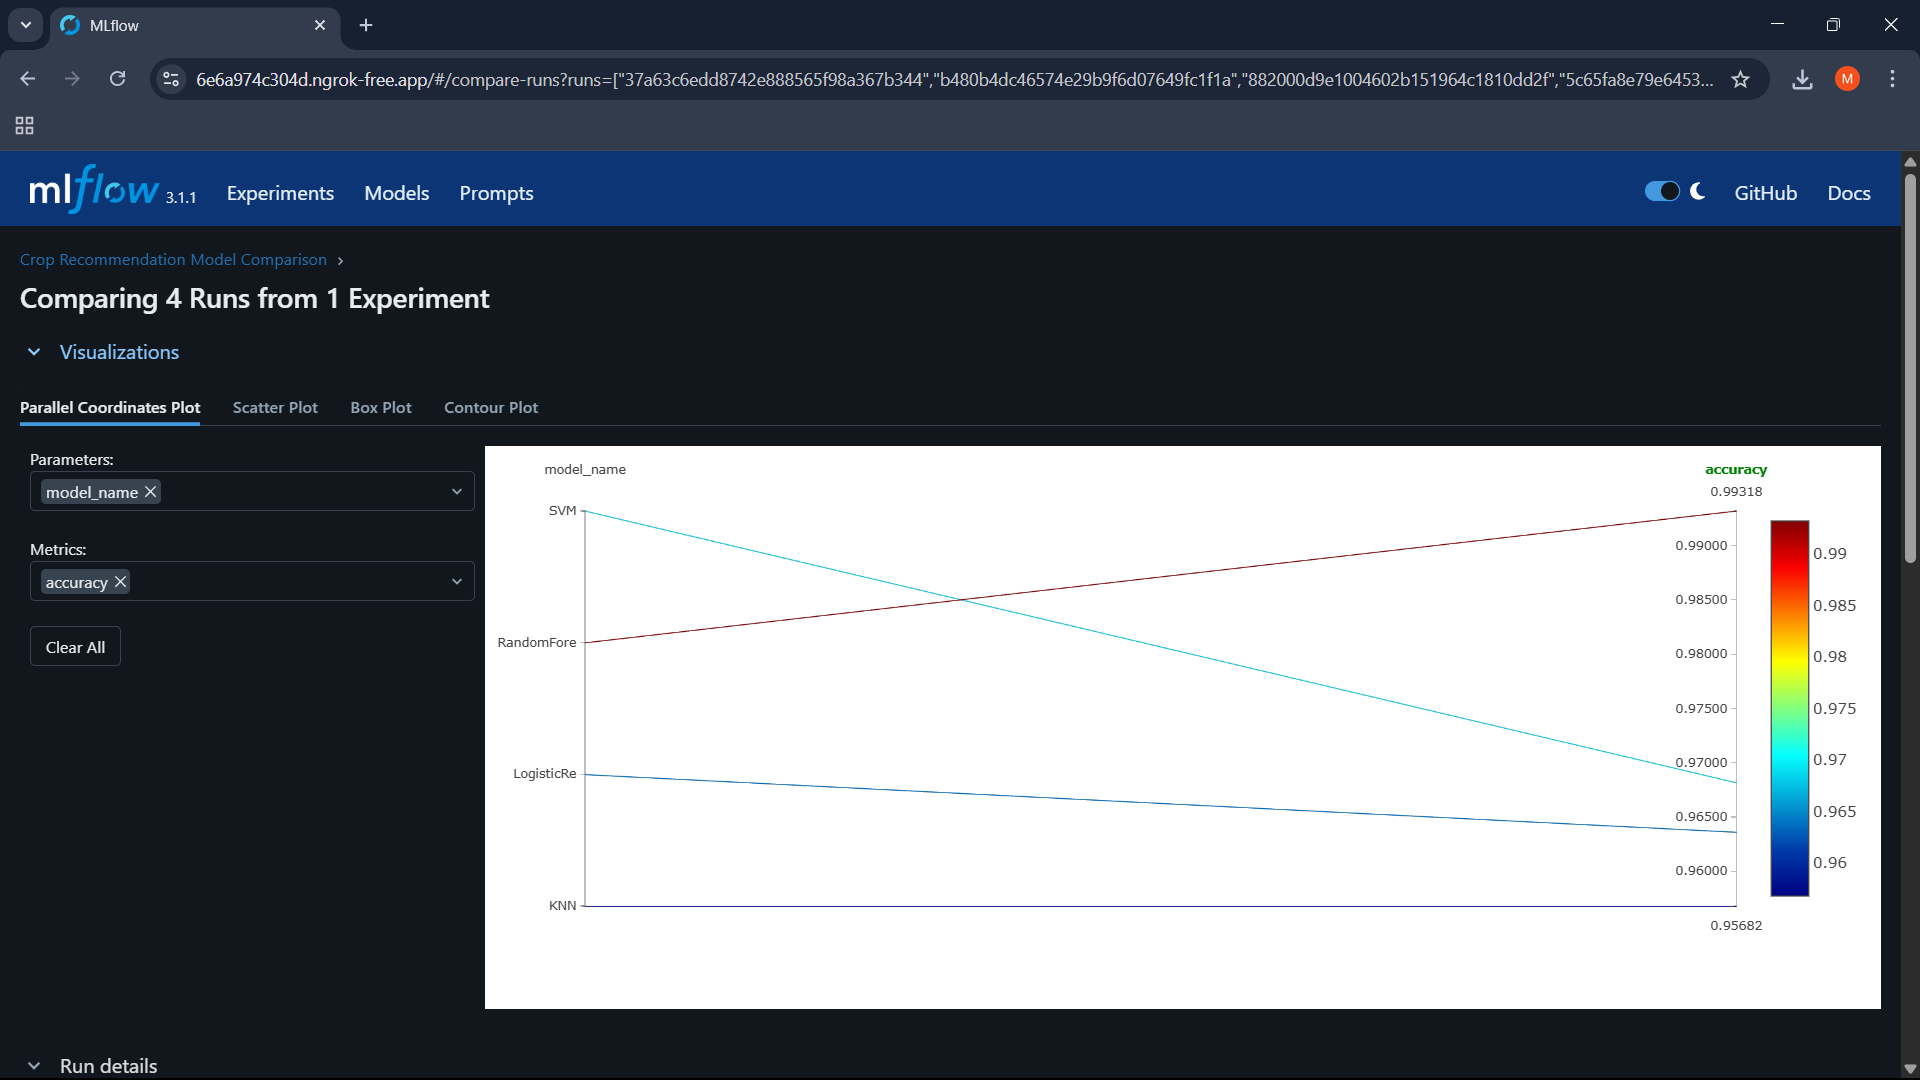

### As we can see RandomForest has the most accuracy so we can package the RandomForest to use it in gradio

In [29]:
import pickle

# Save the trained Random Forest model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(models["RandomForest"], f)


### Implement Gradio

In [30]:
import gradio as gr
import pickle
import numpy as np

# Load the trained model
with open("random_forest_model.pkl", "rb") as f:
    model = pickle.load(f)

# Define the prediction function
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = model.predict(input_data)
    return prediction[0]

# Gradio interface
iface = gr.Interface(
    fn=predict_crop,
    inputs=[
        gr.Number(label="Nitrogen (N)"),
        gr.Number(label="Phosphorus (P)"),
        gr.Number(label="Potassium (K)"),
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="Humidity (%)"),
        gr.Number(label="pH"),
        gr.Number(label="Rainfall (mm)")
    ],
    outputs=gr.Text(label="Recommended Crop"),
    title="Crop Recommendation using Random Forest",
    description="Enter the soil and climate values to predict the best crop to grow."
)

iface.launch()


c:\Users\aswat\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
